In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#import the requests library
import requests

#Import the API key
from config import weather_api_key

In [19]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99f7faa7400b780e88413db25d84c326


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount gambier
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | te anau
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | chernyshevskiy
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | kipini
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | pringsewu
Processing Record 12 of Set 1 | micheweni
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | nyaunglebin
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | yirol
City not found. Skipping...
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | aksu
Processing Record 22 of Set 1 | birao
Processing Record

Processing Record 39 of Set 4 | atig
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | westport
Processing Record 42 of Set 4 | wajir
Processing Record 43 of Set 4 | bonthe
Processing Record 44 of Set 4 | kaeo
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | gimli
Processing Record 47 of Set 4 | moroni
Processing Record 48 of Set 4 | severinia
Processing Record 49 of Set 4 | hofn
Processing Record 50 of Set 4 | cerrik
Processing Record 1 of Set 5 | cherskiy
Processing Record 2 of Set 5 | nhulunbuy
Processing Record 3 of Set 5 | raudeberg
Processing Record 4 of Set 5 | olinda
Processing Record 5 of Set 5 | abonnema
Processing Record 6 of Set 5 | puerto ayora
Processing Record 7 of Set 5 | suleja
Processing Record 8 of Set 5 | lahan
Processing Record 9 of Set 5 | chabahar
Processing Record 10 of Set 5 | puerto del rosario
Processing Record 11 of Set 5 | dunedin
Processing Record 12 of Set 5 | pak phanang
P

Processing Record 31 of Set 8 | vila
Processing Record 32 of Set 8 | mandalgovi
Processing Record 33 of Set 8 | satitoa
City not found. Skipping...
Processing Record 34 of Set 8 | naze
Processing Record 35 of Set 8 | ahuimanu
Processing Record 36 of Set 8 | kaitong
Processing Record 37 of Set 8 | kudahuvadhoo
Processing Record 38 of Set 8 | bengkulu
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | terra santa
Processing Record 42 of Set 8 | huilong
Processing Record 43 of Set 8 | pangnirtung
Processing Record 44 of Set 8 | lubao
Processing Record 45 of Set 8 | tongliao
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | alice springs
Processing Record 48 of Set 8 | namtsy
Processing Record 49 of Set 8 | koroni
Processing Record 50 of Set 8 | jiancheng
Processing Record 1 of Set 9 | tucuma
Processing Record 2 of Set 9 | hosdurga
Processing Record 3 of Set 9 | harper
Processing Record 4 of Set 9 | bethe

Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | atar
Processing Record 21 of Set 12 | nalut
Processing Record 22 of Set 12 | zyryanovsk
Processing Record 23 of Set 12 | ridgecrest
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | ivanteyevka
Processing Record 26 of Set 12 | bokspits
City not found. Skipping...
Processing Record 27 of Set 12 | vila velha
Processing Record 28 of Set 12 | mazatlan
Processing Record 29 of Set 12 | makat
Processing Record 30 of Set 12 | vytegra
Processing Record 31 of Set 12 | alexandria
Processing Record 32 of Set 12 | pontianak
Processing Record 33 of Set 12 | alto parana
Processing Record 34 of Set 12 | sao geraldo do araguaia
Processing Record 35 of Set 12 | hearst
Processing Record 36 of Set 12 | havre-saint-pierre
Processing Record 37 of Set 12 | ambilobe
Processing Record 38 of Set 12 | san felipe
Processing Record 39 of Set 12 | corn island
Processing Record 40 of Set 12 | tecpan
Processing

In [23]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.8333,140.7667,57.11,67,75,8.05,AU,2021-11-17 17:23:29
1,Atuona,-9.8000,-139.0333,77.76,76,23,16.04,PF,2021-11-17 17:23:29
2,Ushuaia,-54.8000,-68.3000,42.46,65,40,23.02,AR,2021-11-17 17:23:29
3,Porto Novo,6.4965,2.6036,84.02,73,78,6.38,BJ,2021-11-17 17:23:29
4,Te Anau,-45.4167,167.7167,38.35,91,36,1.77,NZ,2021-11-17 17:23:30
5,Punta Arenas,-53.1500,-70.9167,48.31,57,75,35.68,CL,2021-11-17 17:22:26
6,Chernyshevskiy,63.0128,112.4714,-9.63,100,96,2.39,RU,2021-11-17 17:23:30
7,Vaini,-21.2000,-175.2000,75.36,88,20,5.75,TO,2021-11-17 17:23:30
8,Kipini,-2.5257,40.5262,80.89,80,89,13.47,KE,2021-11-17 17:23:30
9,Mataura,-46.1927,168.8643,39.16,95,53,2.95,NZ,2021-11-17 17:23:31


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

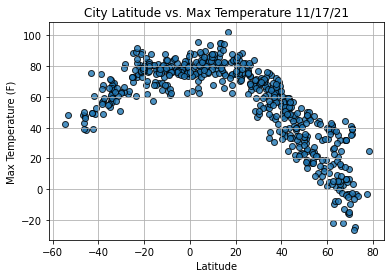

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

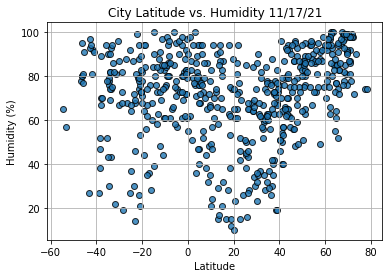

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

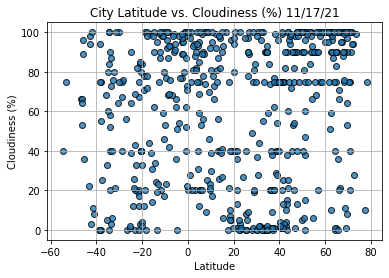

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

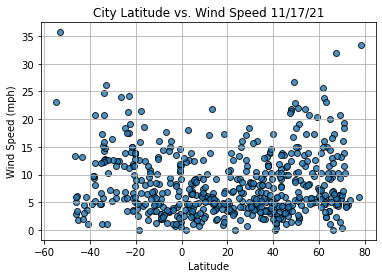

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                  Nyaunglebin
Lat                         17.95
Lng                       96.7333
Max Temp                    74.53
Humidity                       94
Cloudiness                     21
Wind Speed                   4.94
Country                        MM
Date          2021-11-17 17:23:32
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
553     True
554     True
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Porto Novo,6.4965,2.6036,84.02,73,78,6.38,BJ,2021-11-17 17:23:29
6,Chernyshevskiy,63.0128,112.4714,-9.63,100,96,2.39,RU,2021-11-17 17:23:30
13,Nyaunglebin,17.9500,96.7333,74.53,94,21,4.94,MM,2021-11-17 17:23:32
14,Butaritari,3.0707,172.7902,81.72,76,88,12.59,KI,2021-11-17 17:23:32
15,Anadyr,64.7500,177.4833,21.00,85,75,20.00,RU,2021-11-17 17:23:33
...,...,...,...,...,...,...,...,...,...
553,Zhangye,38.9342,100.4517,38.12,19,28,4.03,CN,2021-11-17 17:38:01
554,Nivala,63.9167,24.9667,38.17,83,100,9.46,FI,2021-11-17 17:38:01
555,Udimskiy,61.1417,45.9144,14.97,94,95,4.18,RU,2021-11-17 17:38:01
556,Gigmoto,13.7796,124.3900,78.73,85,98,3.47,PH,2021-11-17 17:38:01


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

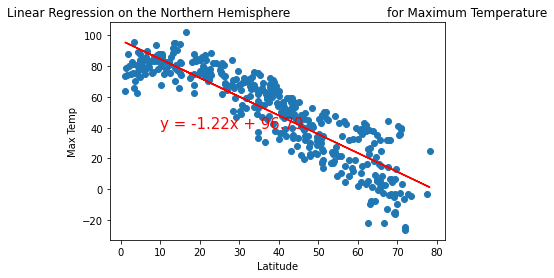

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

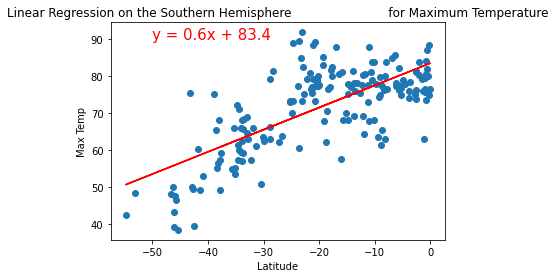

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

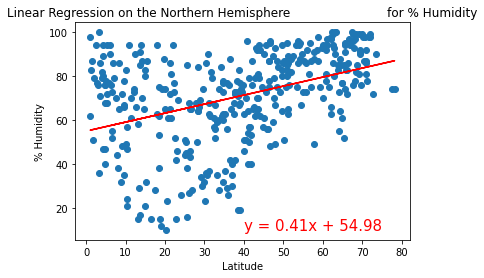

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

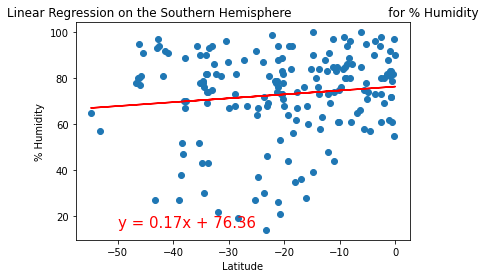

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

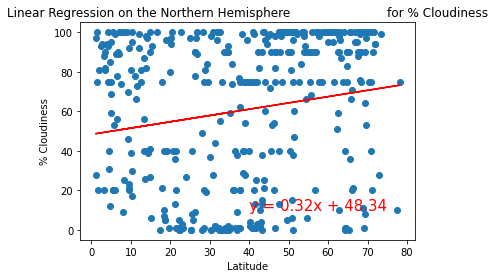

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

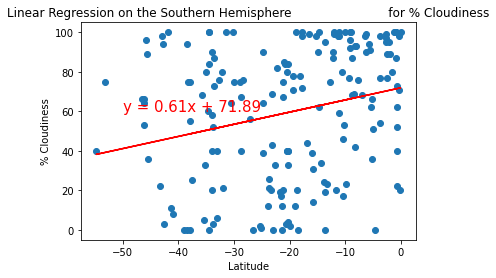

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

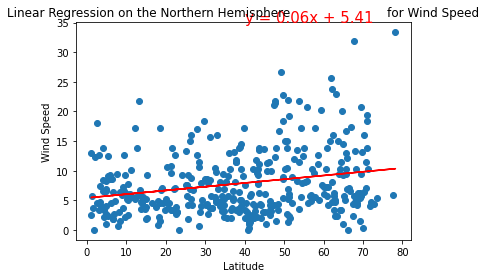

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

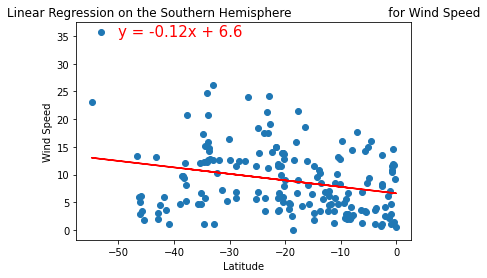

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))